In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ast
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

## Import Data, Some constraint is addded to eliminate outliers

In [2]:
data_selected=pd.read_csv('C:/Users/herry/Desktop/data mining/cleaned_car_another.csv')
data_selected
data_selected = data_selected.loc[data_selected['price'] < 99999]
data_selected = data_selected.loc[data_selected['general_fuel_economy'] < 40]

## Identify Numercial variables

In [3]:
num = ['horsepower','back_legroom(inch)', 'daysonmarket', 'front_legroom(inch)', 'mileage',
       'savings_amount', 'seller_rating', 'general_fuel_economy',
       'wheelbase_to_width_ratio']

## Plot numerical column to look at data skewness

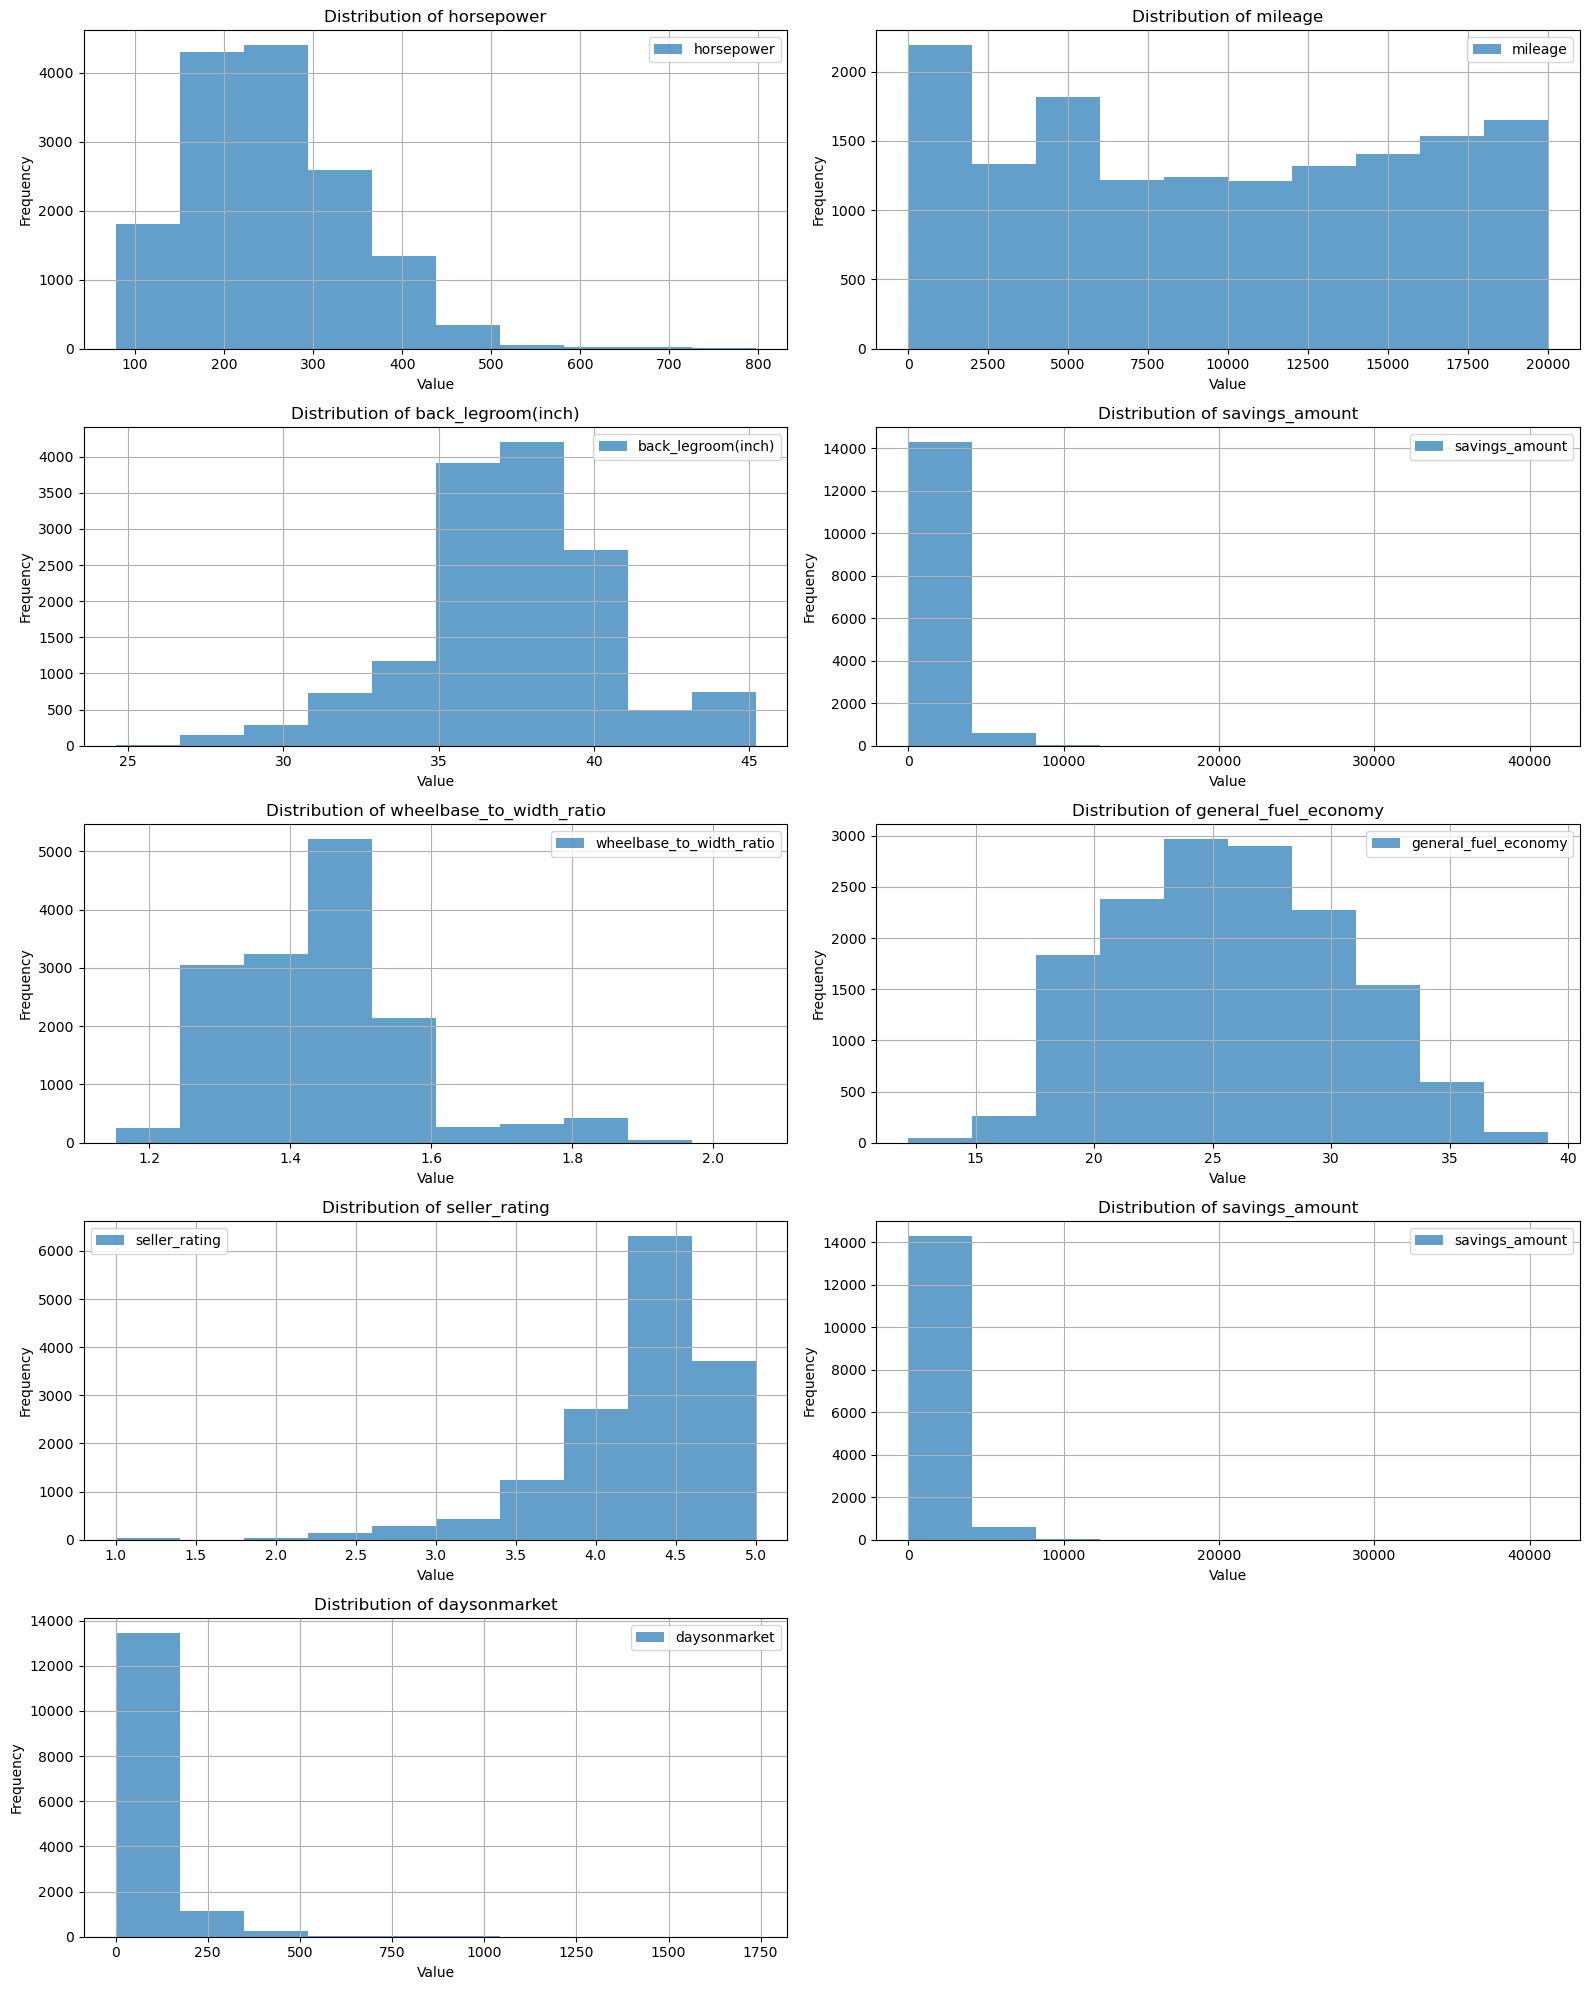

In [4]:

num = ['horsepower', 'mileage', 'back_legroom(inch)', 'savings_amount', 'wheelbase_to_width_ratio', 'general_fuel_economy', 'seller_rating','savings_amount','daysonmarket']

# Determine the number of rows and columns for the subplot grid
n_rows = len(num) // 2 if len(num) % 2 == 0 else len(num) // 2 + 1
n_cols = 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(num):
    axes[i].hist(data_selected[col], bins=10, alpha=0.7, label=col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()
    axes[i].grid(True)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


## Plot the columns to check for linearity between each variable vs target variable

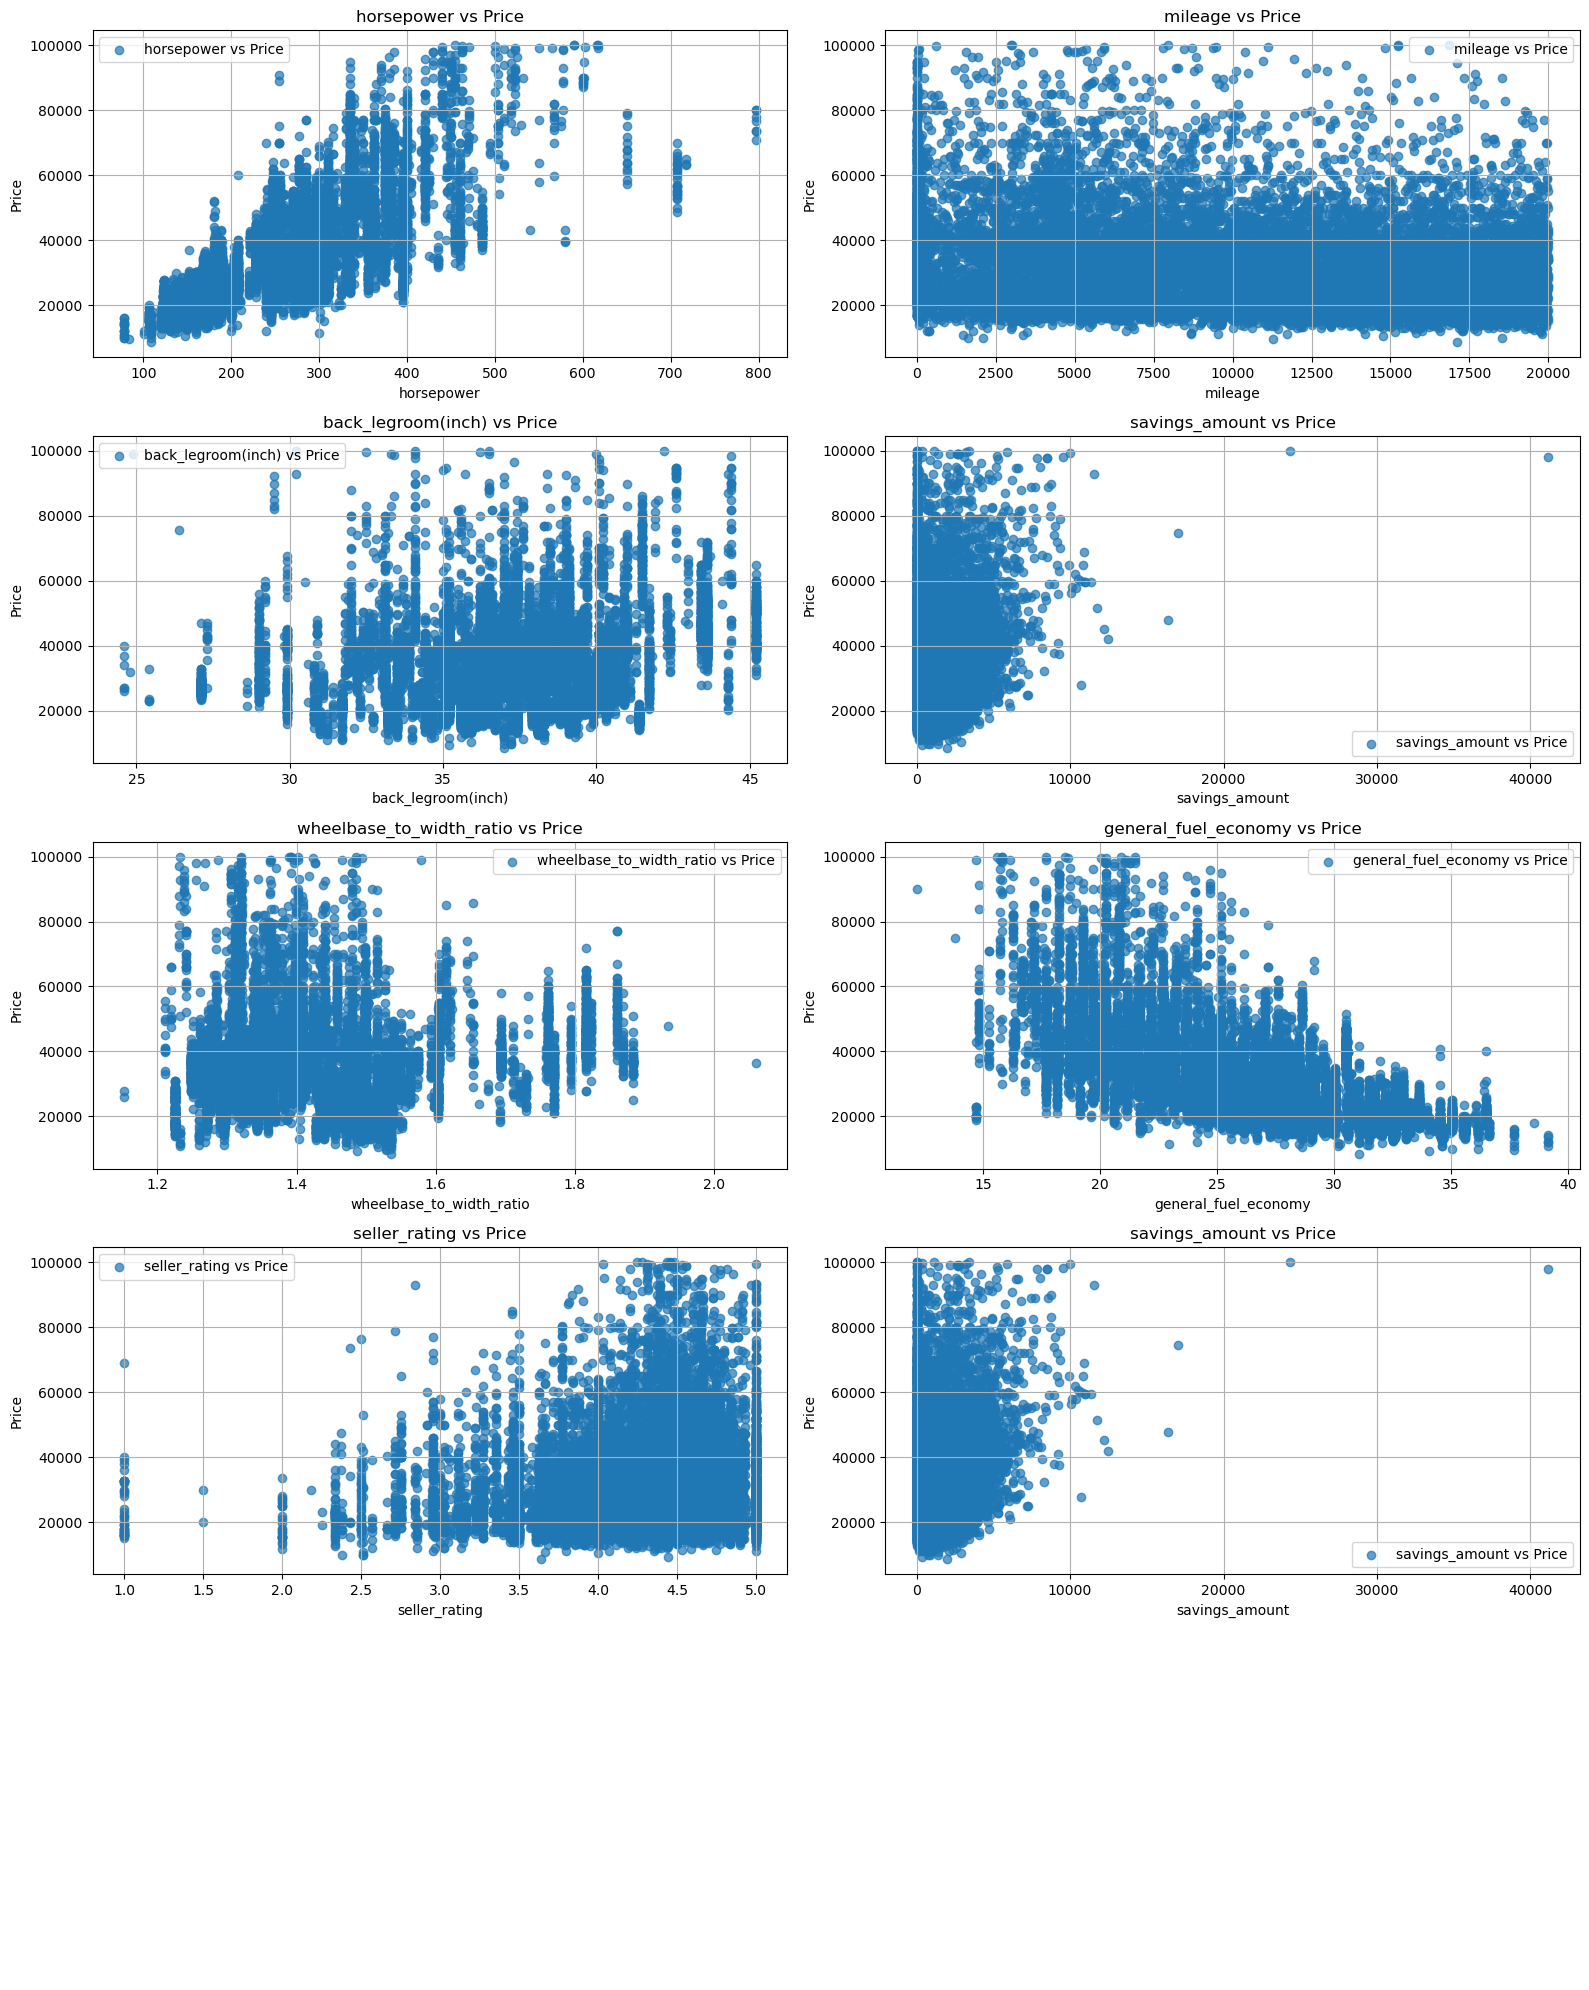

In [5]:
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num[:-1]):  # Exclude 'price' from the independent variables
    axes[i].scatter(data_selected[col], data_selected['price'], alpha=0.7, label=f'{col} vs Price')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{col} vs Price')
    axes[i].legend()
    axes[i].grid(True)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Apply proper tranformation method to numercial variables

In [6]:
right_skew =['horsepower','front_legroom(inch)','price','wheelbase_to_width_ratio','general_fuel_economy',
       'wheelbase_to_width_ratio','savings_amount','daysonmarket']
left_skew =['seller_rating']


In [7]:

data_selected=data_selected.dropna()

data_selected_norm = data_selected.copy()


for column in right_skew:
    min_value = data_selected_norm[column].min()
    if min_value <= 0:
        shift_value = abs(min_value) + 1
        data_selected_norm[column] += shift_value

# Apply logarithmic transformation
for column in right_skew:
    data_selected_norm[column] = np.log(data_selected_norm[column])

    
data_selected_norm[left_skew] = np.exp(data_selected_norm[left_skew])

data_selected_norm['savings_amount'], _ = stats.boxcox(data_selected_norm['savings_amount']+1)

## plot numerical variables to check data skewness

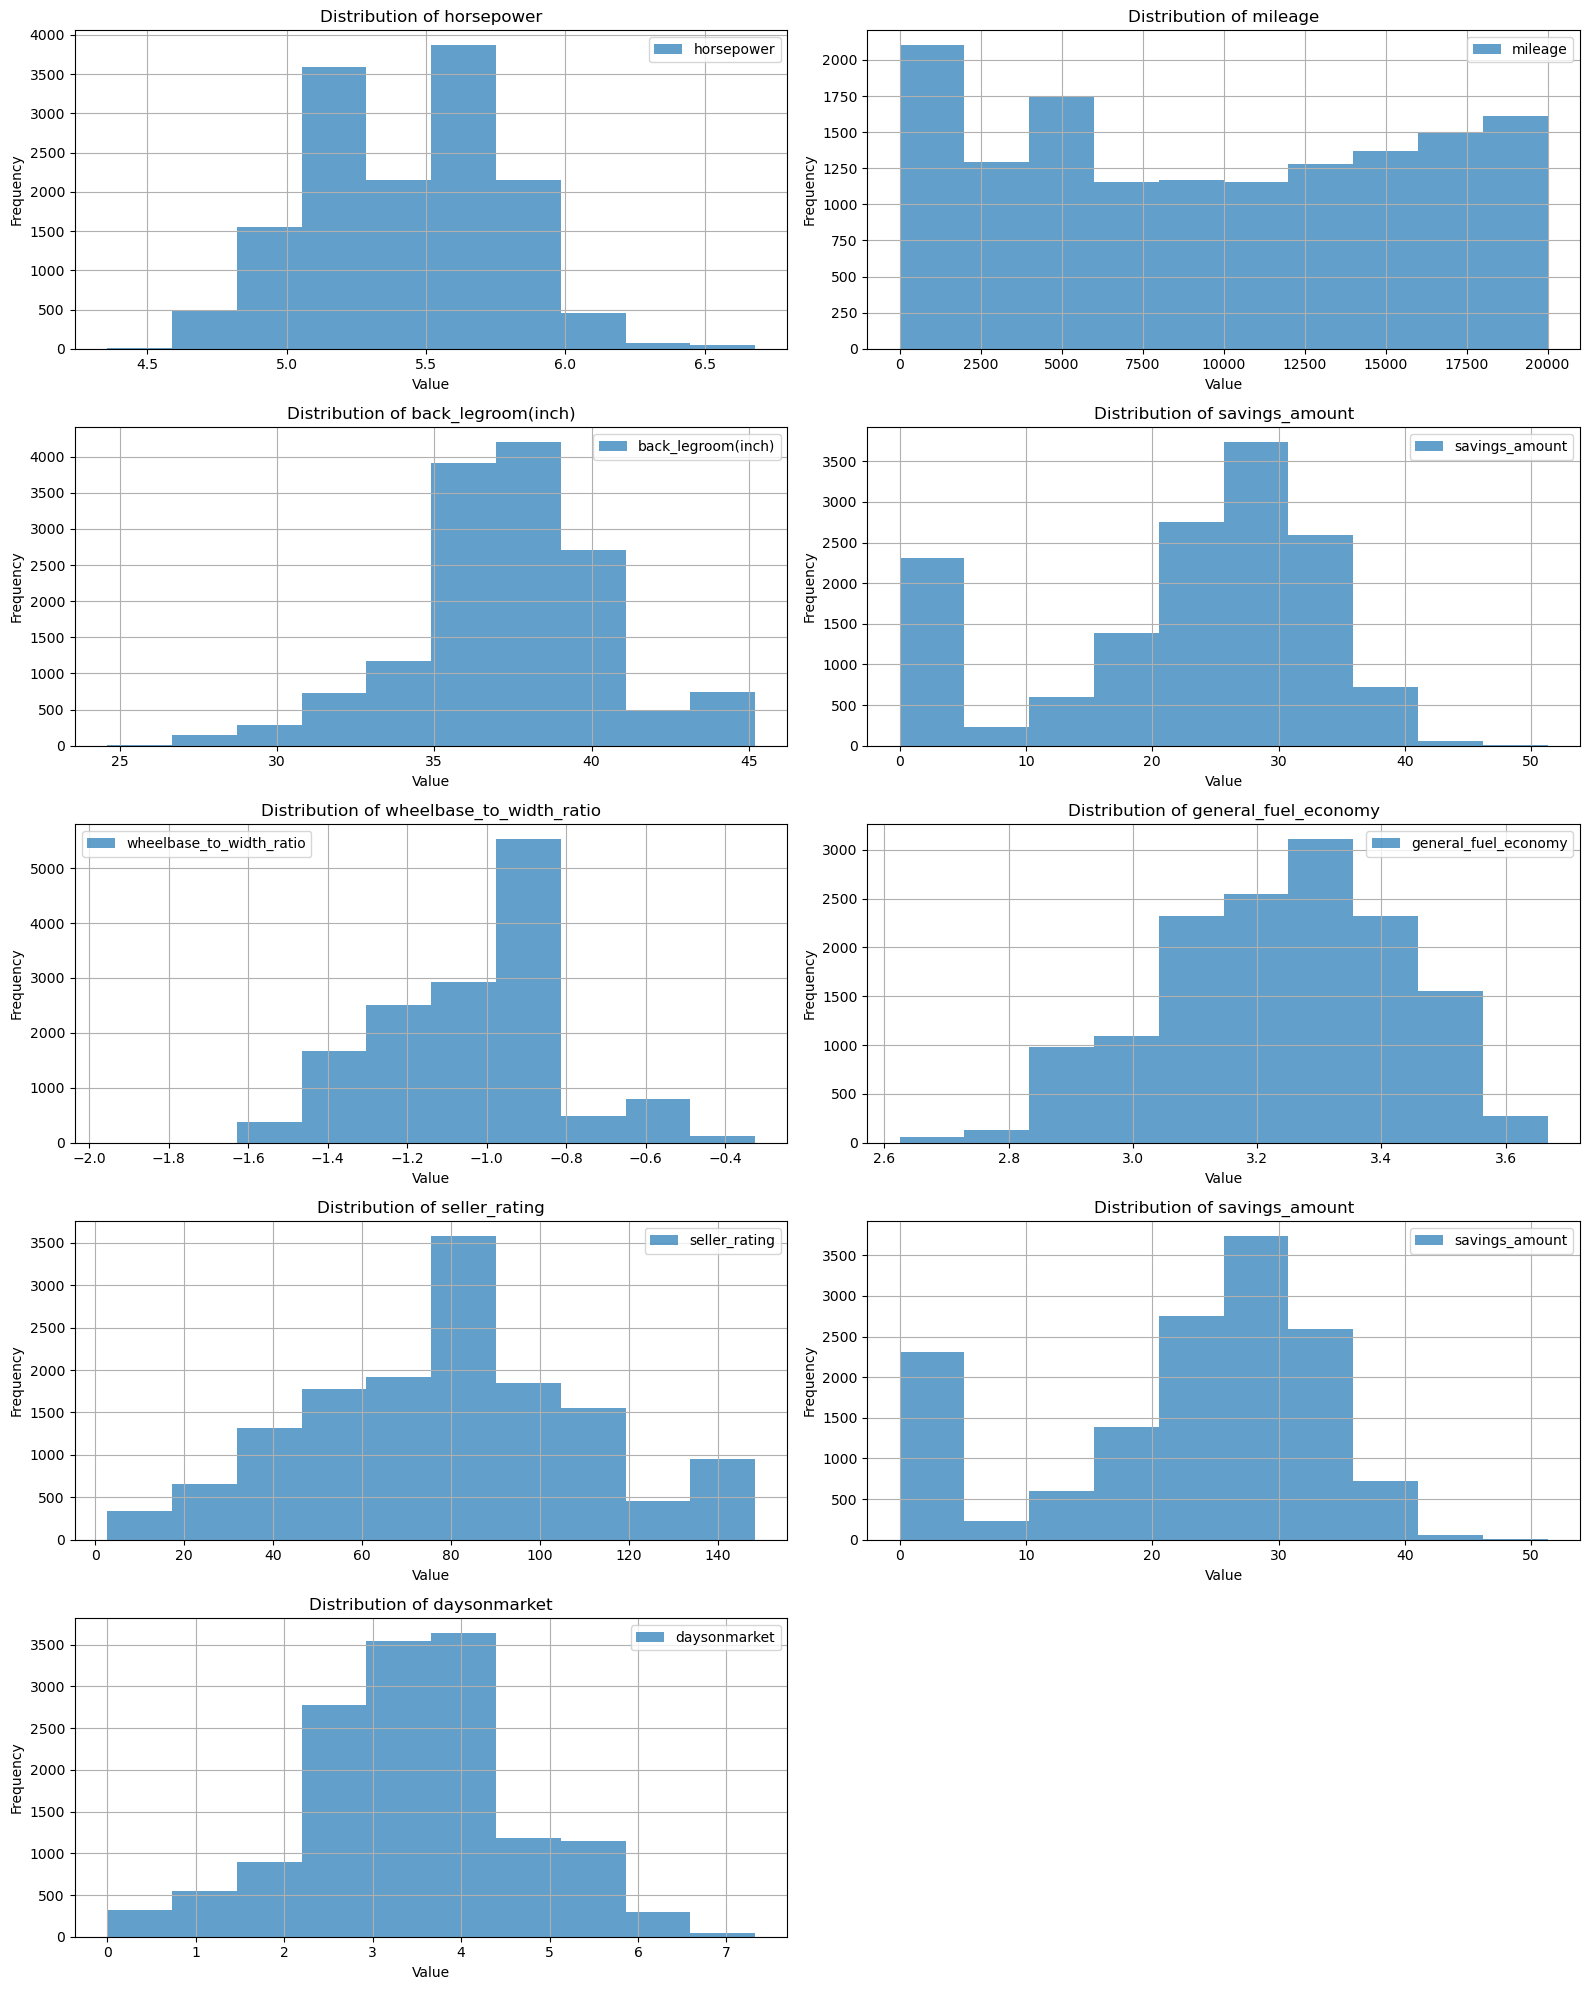

In [8]:


num = ['horsepower', 'mileage', 'back_legroom(inch)', 'savings_amount', 'wheelbase_to_width_ratio', 'general_fuel_economy', 'seller_rating','savings_amount','daysonmarket']

# Determine the number of rows and columns for the subplot grid
n_rows = len(num) // 2 if len(num) % 2 == 0 else len(num) // 2 + 1
n_cols = 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the numerical columns and create a histogram for each
for i, col in enumerate(num):
    axes[i].hist(data_selected_norm[col], bins=10, alpha=0.7, label=col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()
    axes[i].grid(True)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

## Plot tranformed numerical variables vs target variables for linearity check

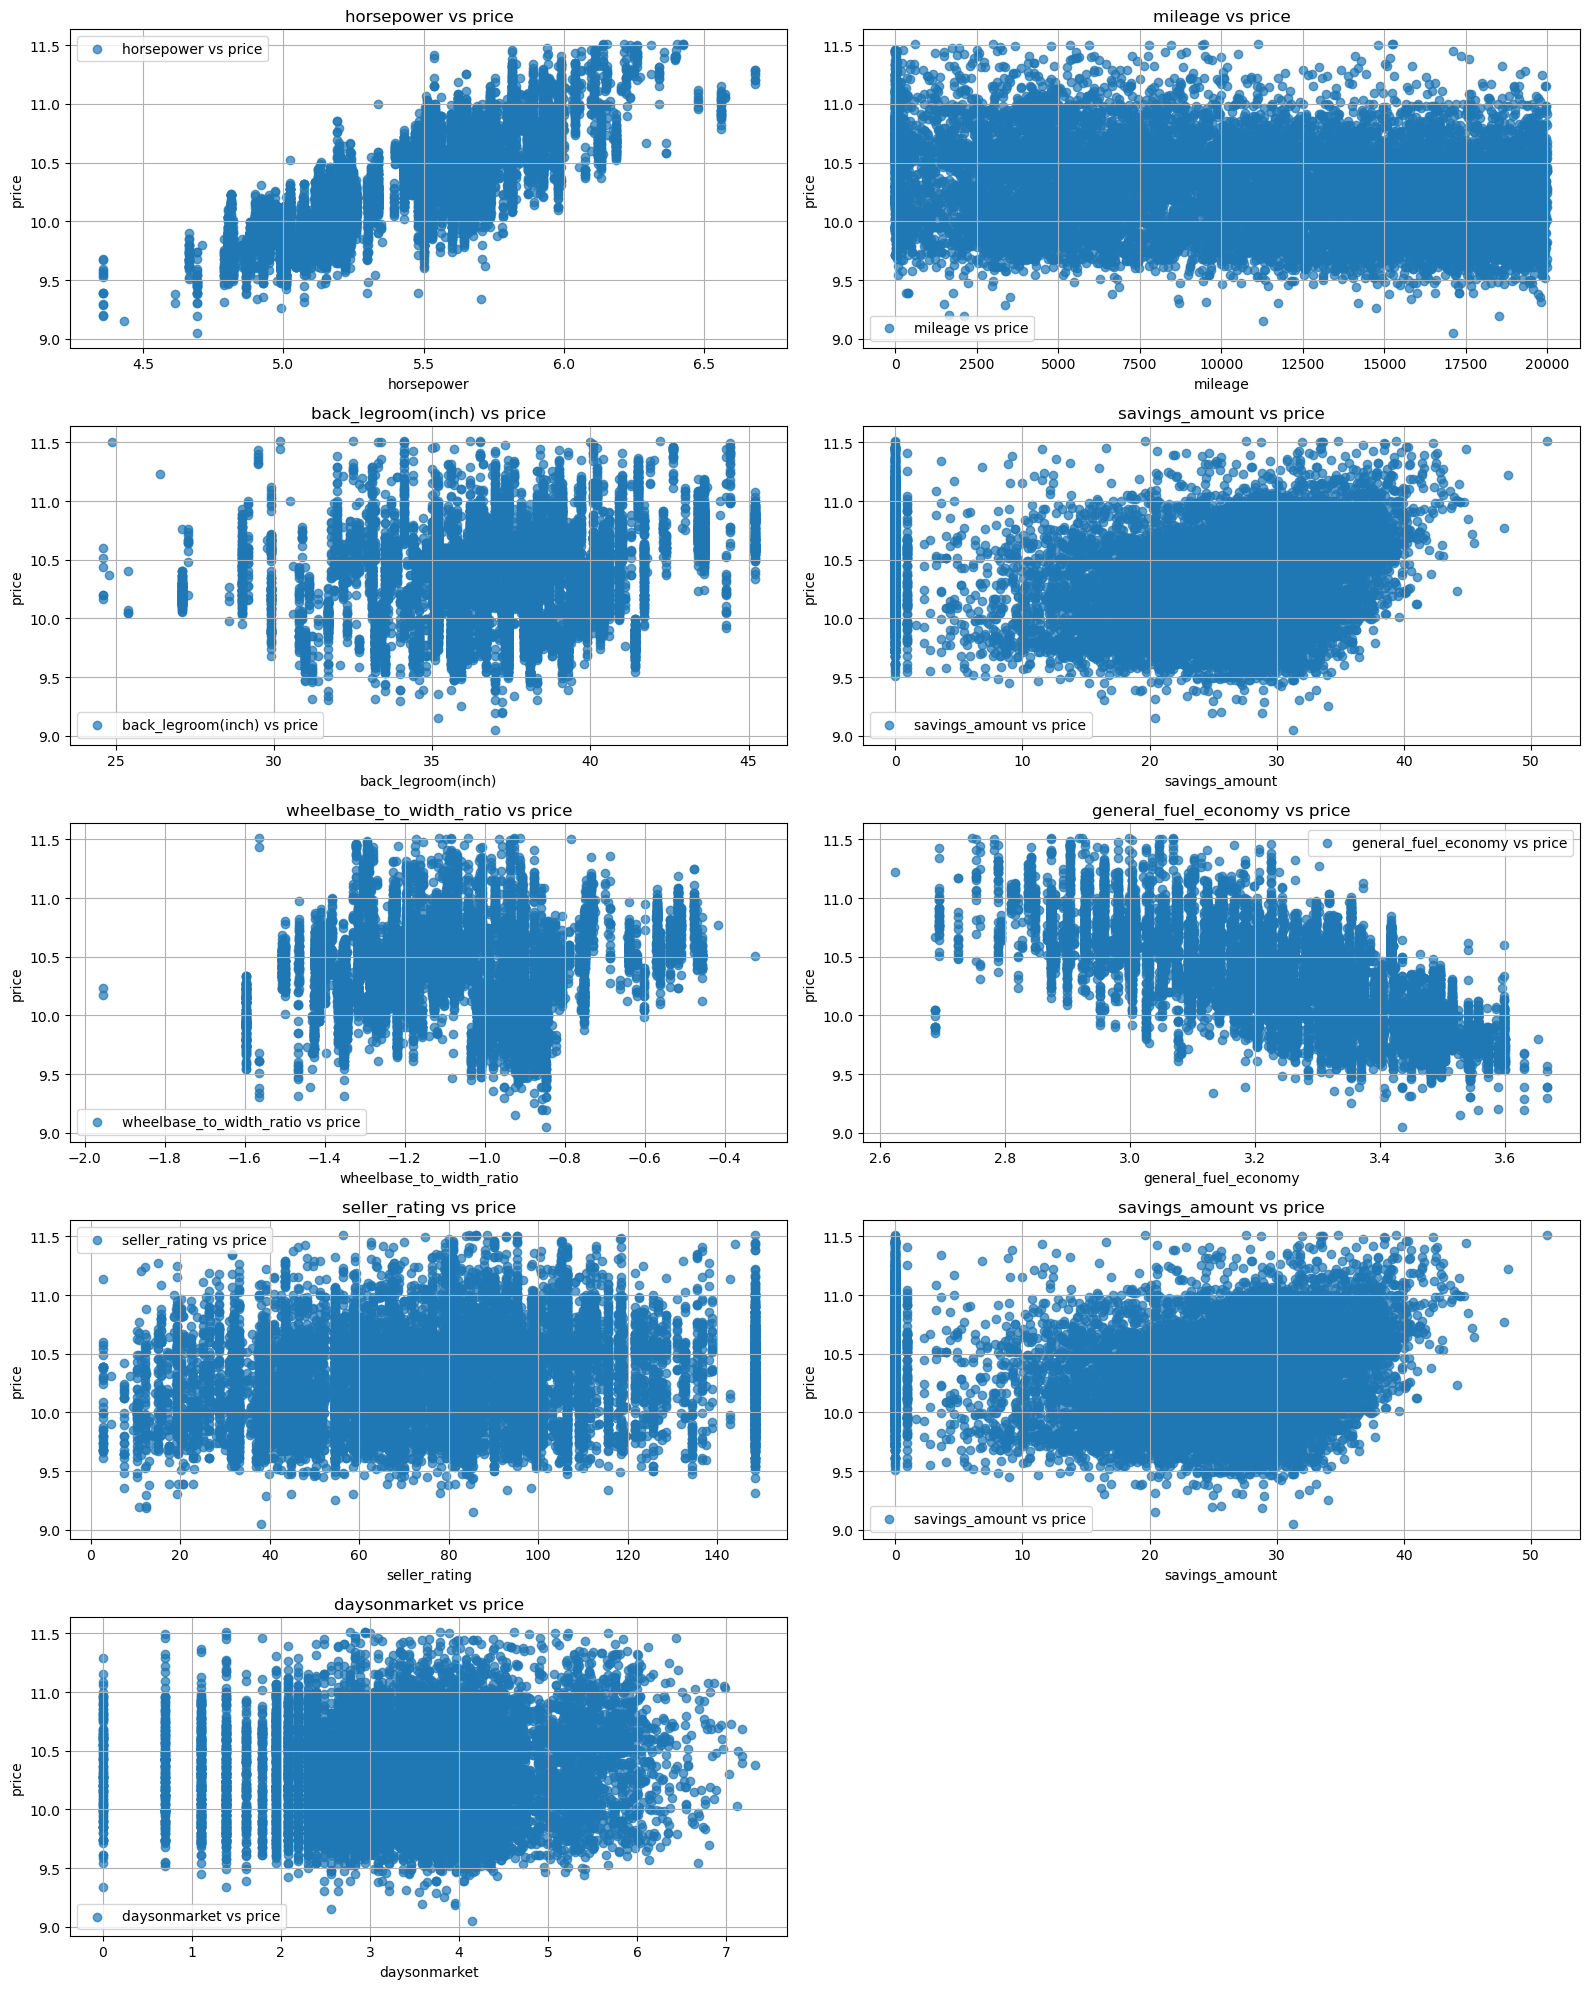

In [9]:
target = 'price'  # Assuming 'price' is the target variable

# Determine the number of rows and columns for the subplot grid
n_rows = len(num) // 2 if len(num) % 2 == 0 else len(num) // 2 + 1
n_cols = 2

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Loop through the numerical columns and create a scatter plot for each
for i, col in enumerate(num):
    axes[i].scatter(data_selected_norm[col], data_selected_norm[target], alpha=0.7, label=f'{col} vs {target}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{col} vs {target}')
    axes[i].legend()
    axes[i].grid(True)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Linear regression

In [10]:

# X = data_selected.drop('price', axis=1)
# y = data_selected['price']
data_selected_norm=data_selected_norm.dropna()
X = data_selected_norm.drop('price', axis=1)
y = data_selected_norm['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Squared Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.09822441748879789
Mean Squared Error: 0.01667910010543982
Mean Squared Error: 0.12914759039734275
R-squared: 0.8935175372276233
Adjusted R-squared: 0.8927498677612864


In [13]:
coefficients = model.coef_
intercept = model.intercept_

# Print the intercept
print(f"Intercept: {intercept}")

# Print the coefficients along with their corresponding column names
for col, coef in zip(X.columns, model.coef_):
    print(col, coef)

Intercept: 6.811081024027231
horsepower 0.4902789355350519
back_legroom(inch) 0.009905473250228692
daysonmarket -0.004916486192932362
front_legroom(inch) 0.5949111898264208
mileage -3.760184497048069e-06
savings_amount -0.000652808845927999
seller_rating 0.00020043098607387677
general_fuel_economy -0.45922963377960946
wheelbase_to_width_ratio 0.16652340277260427
isCab_False 0.03543577046228938
isCab_True -0.03543577046234865
is_new_False -0.04536125301796676
is_new_True 0.045361253017860786
Sunroof/Moonroof_False -0.03101732277787278
Sunroof/Moonroof_True 0.03101732277798913
Navigation System_False -0.04455660178280629
Navigation System_True 0.04455660178316839
body_type_Convertible 0.1274844923176398
body_type_Coupe 0.022023556130960742
body_type_Hatchback -0.03693479342634966
body_type_Minivan -0.057135767893233325
body_type_Pickup Truck -0.02438454145638333
body_type_SUV / Crossover -0.0025571057629461894
body_type_Sedan -0.05540232218334368
body_type_Van -0.03612096568457543
body_t

## Plot residuals

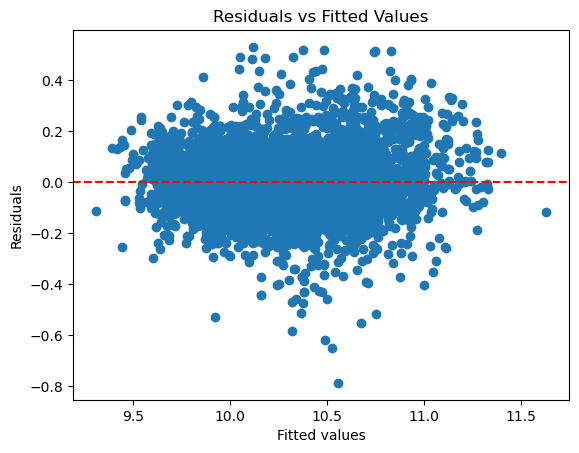

In [14]:
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Adds a horizontal line at zero for reference
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## plot scatter plot for pred vs test to see the goodnees of fit for our model

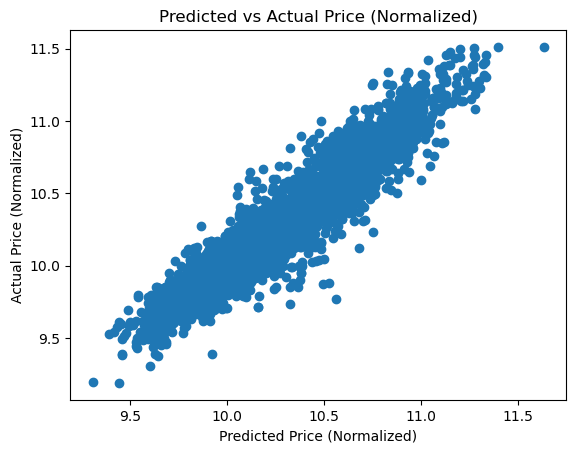

In [15]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price (Normalized)')  # Add x-axis label
plt.ylabel('Actual Price (Normalized)')     # Add y-axis label
plt.title('Predicted vs Actual Price (Normalized)')  # Add title
plt.show()


## Plot an QQ plot to see the distribution of out prediciton

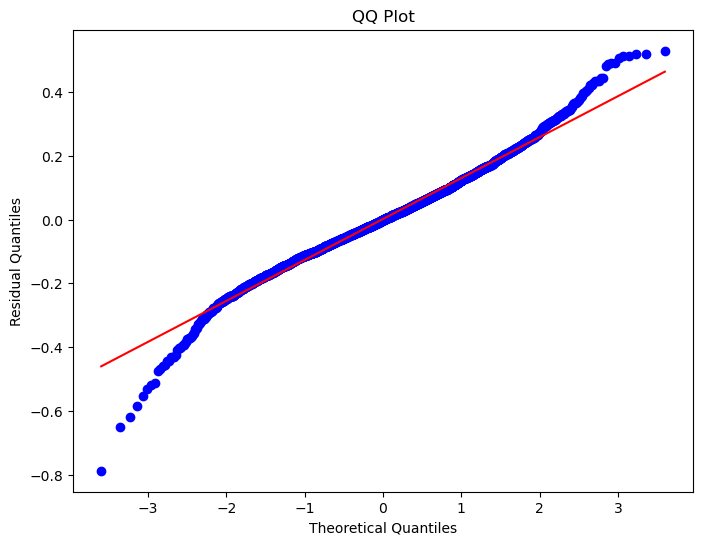

In [16]:

# Generate QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Residual Quantiles")
plt.show()

## Check the percentage of cars that's been over priced

In [17]:
y_pred_price_norm_ACTUAL = np.exp(y_pred)
y_test_price_norm_ACTUAL = np.exp(y_test)

df = pd.DataFrame({'Predicted' : y_pred_price_norm_ACTUAL, 'Actual' : y_test_price_norm_ACTUAL})


diff = df['Actual'] - df['Predicted']
large_diff_15000 = df.loc[diff > 15000, 'Actual']
large_diff_12500 = df.loc[diff > 12500, 'Actual']
large_diff_10000 = df.loc[diff > 10000, 'Actual']
large_diff_7500 = df.loc[diff > 7500, 'Actual']
large_diff_5000 = df.loc[diff > 5000, 'Actual']
large_diff_2500 = df.loc[diff > 2500, 'Actual']

In [18]:
print(f'cars whoes predicted  price is $15,000 larger than actual: {large_diff_15000.shape} which is {(large_diff_15000.shape[0]/y_test_price_norm_ACTUAL.shape[0])}% of Cars')
print(f'cars whoes predicted  price is $12,500 larger than actual: {large_diff_12500.shape} which is {(large_diff_12500.shape[0]/y_test_price_norm_ACTUAL.shape[0])}% of Cars')
print(f'cars whoes predicted  price is $10,000 larger than actual: {large_diff_10000.shape} which is {(large_diff_10000.shape[0]/y_test_price_norm_ACTUAL.shape[0])}% of Cars')
print(f'cars whoes predicted  price is $7,500 larger than actual: {large_diff_7500.shape} which is {(large_diff_7500.shape[0]/y_test_price_norm_ACTUAL.shape[0])}% of Cars')
print(f'cars whoes predicted  price is $5000 larger than actual: {large_diff_5000.shape} which is {(large_diff_5000.shape[0]/y_test_price_norm_ACTUAL.shape[0])}% of Cars')
print(f'cars whoes predicted  price is $2500 larger than actual: {large_diff_2500.shape} which is {(large_diff_2500.shape[0]/y_test_price_norm_ACTUAL.shape[0])}% of Cars')

y_test_price_norm_ACTUAL.shape


cars whoes predicted  price is $15,000 larger than actual: (76,) which is 0.01760074108383511% of Cars
cars whoes predicted  price is $12,500 larger than actual: (115,) which is 0.026632700324224177% of Cars
cars whoes predicted  price is $10,000 larger than actual: (173,) which is 0.040064844835572024% of Cars
cars whoes predicted  price is $7,500 larger than actual: (287,) which is 0.0664659564613247% of Cars
cars whoes predicted  price is $5000 larger than actual: (499,) which is 0.11556276053728579% of Cars
cars whoes predicted  price is $2500 larger than actual: (1003,) which is 0.23228346456692914% of Cars


(4318,)

## Random Forest

In [19]:
# X = data_selected.drop('price', axis=1)
# y = data_selected['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Squared Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.06652363040526332
Mean Squared Error: 0.009106173333427354
Mean Squared Error: 0.09542627171501229
R-squared: 0.941864503669521
Adjusted R-squared: 0.941445384461707


### Use Crossvalidation and random search to find the best parameter

In [21]:

param_grid = {
     'max_leaf_nodes': np.arange(2, 100),
     'max_depth': np.arange(5, 15),
     'n_estimators': [100,200,300,400,500],
     'min_samples_split': [20, 30, 40,50,60]
}
gridSearch = RandomizedSearchCV(rf, param_grid, cv=5, 
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.8847482639905564
Initial parameters:  {'n_estimators': 500, 'min_samples_split': 30, 'max_leaf_nodes': 91, 'max_depth': 8}


In [22]:
rf = gridSearch.best_estimator_
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Squared Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.10282542194642594
Mean Squared Error: 0.01843753457329358
Mean Squared Error: 0.13578488344912912
R-squared: 0.8822913660566838
Adjusted R-squared: 0.8814427631802113


### Gradient Boosting

In [24]:
# X = data_selected.drop('price', axis=1)
# y = data_selected['price']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)


y_pred = gbr.predict(X_test)

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Squared Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.09749584100255558
Mean Squared Error: 0.016535656245035262
Mean Squared Error: 0.12859104263141838
R-squared: 0.8944333093873259
Adjusted R-squared: 0.8936722420440694


### Random Search for best parameter

In [27]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': np.arange(1,100),
    'min_samples_split': [20, 30, 40,50,60],
    'min_samples_leaf': np.arange(1,100),
    'max_features': [None, 'sqrt', 'log2']
}

# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(gbr, param_distributions=param_grid, 
                                    n_iter=20, cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 95, 'max_features': None, 'max_depth': 81, 'learning_rate': 0.2}
Best score: 0.9472855759870008


## Use best parameter found and rerun the model

In [28]:
gbr = random_search.best_estimator_
gbr.fit(X_train, y_train)

# Make predictions
y_pred = gbr.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Squared Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.06519353901242515
Mean Squared Error: 0.008099244201124841
Mean Squared Error: 0.0899958010194078
R-squared: 0.9482929256567393
Adjusted R-squared: 0.9479201512004254


# Ensemble Method

Use Averaging method 

In [30]:
voting_reg = VotingRegressor(
    estimators=[
        ('Lienar Regression', model),
        ('Random Forest', rf),
        ('Gradient Boosting', gbr)
    ]
)

voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

n = X.shape[0]
p = X.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

print(f"Mean Squared Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Squared Error: {np.sqrt(mse)}")
print(f"R-squared: {r2}")
print("Adjusted R-squared:", adjusted_r2)

Mean Squared Error: 0.07699362193885577
Mean Squared Error: 0.010539093852451047
Mean Squared Error: 0.10266008889754112
R-squared: 0.9327164738083086
Adjusted R-squared: 0.9322314032408175


## Finish